### Análisis exploratorio - EDA

#### Importación de librerías

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
#from sklearn.linear_model.logistic import LogisticRegression
import _pickle as pickle
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import naive_bayes

from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
import matplotlib.pyplot  as plt

#### Importación de datos e impresión de los cinco primeros registros

In [2]:
# Después de pd.read_csv introducir el enlace correspondiente en raw.
df = pd.read_csv("https://raw.githubusercontent.com/jaimesz11/Ataques_al_corazon-Predicciones_y_analisis/main/Datos/heart.csv?token=ARVDOLKDUA4A6TWL5EHK77DAWJJQW")
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### Medidas estadísticas de las variables de la tabla de datos

In [3]:
df.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Tipo de valores

In [4]:
df.dtypes

age           int64
sex           int64
cp            int64
trtbps        int64
chol          int64
fbs           int64
restecg       int64
thalachh      int64
exng          int64
oldpeak     float64
slp           int64
caa           int64
thall         int64
output        int64
dtype: object

#### Dimensiones de la tabla

In [5]:
dimensiones = df.shape
print("El dataset está formado por {} filas y {} columnas".format(dimensiones[0], dimensiones[1]))

El dataset está formado por 303 filas y 14 columnas


#### Valores únicos en cada campo 

In [6]:
diccionario = {}
for i in list(df.columns):
    diccionario[i] = df[i].value_counts().shape[0]

pd.DataFrame(diccionario, index = ["Valores únicos"]).transpose()

,Valores únicos
age,41
sex,2
cp,4
trtbps,49
chol,152
fbs,2
restecg,3
thalachh,91
exng,2
oldpeak,40


#### Valores nulos

In [7]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Distinción campos categóricos y continuos

In [9]:
var_categoricas = ["sex", "cp", "fbs", "restecg", "exng", "caa", "thall", "slp"]
var_continuas = ["age", "trtbps", "chol", "thalachh", "oldpeak"]
var_objetivo = ["output"]


#### Comprobación de duplicados

In [10]:
df.duplicated().sum() 

1

In [11]:
df = df.drop_duplicates() # Borro los registros duplicados, en este caso 1.
df.shape # Compruebo dimensiones para ver si el registro se ha eliminado

(302, 14)

#### Comprobación de valores nulos

In [12]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

#### Detección de outliers 

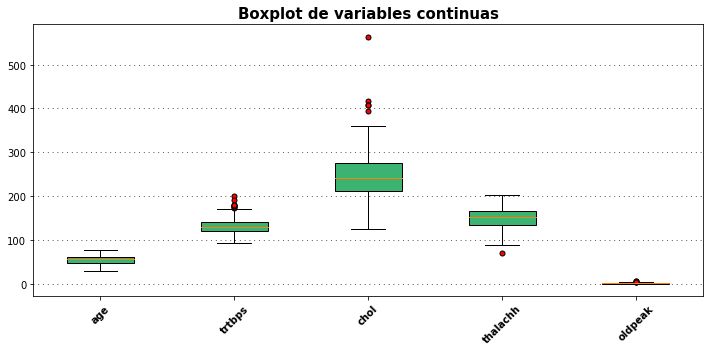

In [13]:
flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, linestyle='none') # Para los outliers en el boxplot

fig, ax = plt.subplots(figsize = (12, 5))
plot_outliers = ax.boxplot(df[var_continuas], 
                flierprops = flierprops, 
                patch_artist = True,
                boxprops = dict(facecolor='mediumseagreen'))
ax.set_title("Boxplot de variables continuas", 
            color = 'black', 
            fontweight = 'bold', 
            fontsize = '15')
ax.set_xticklabels(var_continuas, 
                  color = 'black', 
                  rotation = 45, 
                  fontweight = 'bold', 
                  fontsize = '10')
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

#### Distribución de los valores de las variables categóricas

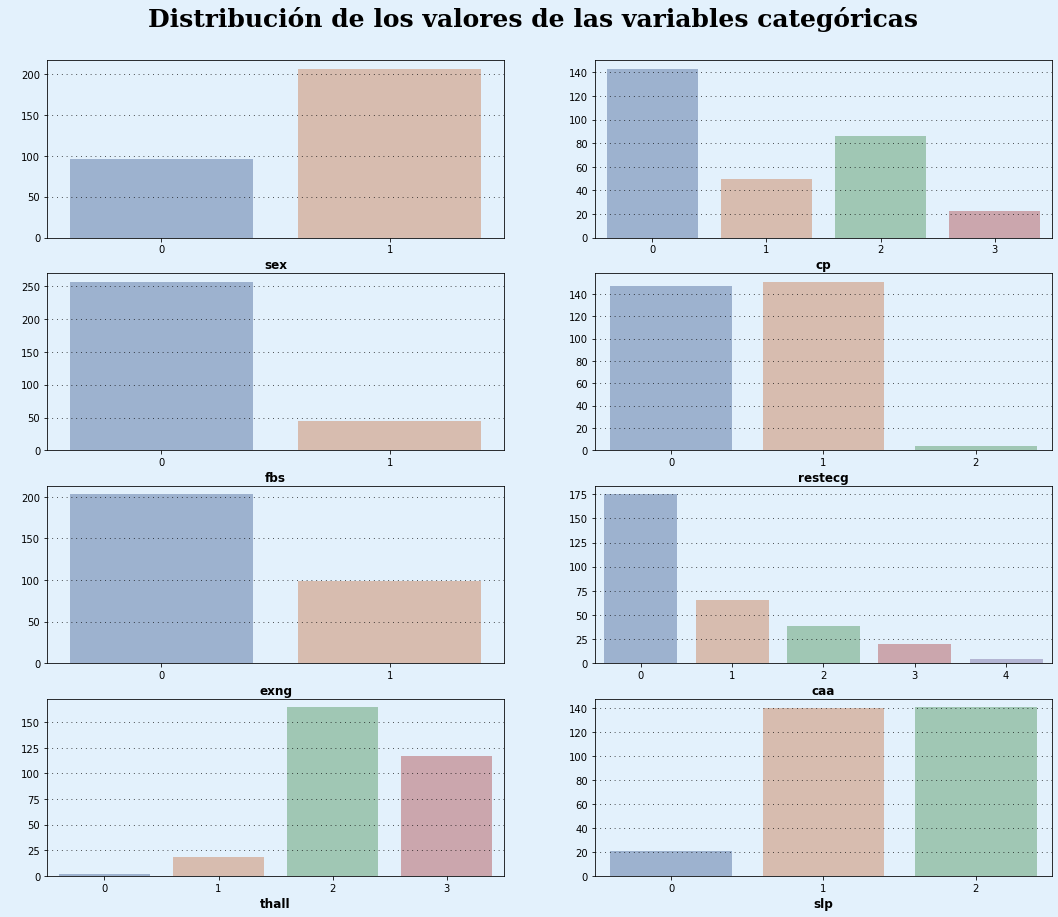

In [15]:
fig, axs = plt.subplots(4, 2, figsize = (18, 15))

fig.suptitle('Distribución de los valores de las variables categóricas', fontweight = 'bold', fontfamily='serif', fontsize = 25, y = 0.93)

ax0 = sns.countplot(x = var_categoricas[0], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[0, 0])
ax0.set_xlabel(var_categoricas[0], fontweight = 'bold', fontsize = 12)
ax0.set_ylabel(" ")
ax0.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax1 = sns.countplot(x = var_categoricas[1], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[0, 1])
ax1.set_xlabel(var_categoricas[1], fontweight = 'bold', fontsize = 12)
ax1.set_ylabel(" ")
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax2 = sns.countplot(x = var_categoricas[2], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[1, 0])
ax2.set_xlabel(var_categoricas[2], fontweight = 'bold', fontsize = 12)
ax2.set_ylabel(" ")
ax2.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax3 = sns.countplot(x = var_categoricas[3], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[1, 1])
ax3.set_xlabel(var_categoricas[3], fontweight = 'bold', fontsize = 12)
ax3.set_ylabel(" ")
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax4 = sns.countplot(x = var_categoricas[4], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[2, 0])
ax4.set_xlabel(var_categoricas[4], fontweight = 'bold', fontsize = 12)
ax4.set_ylabel(" ")
ax4.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax5 = sns.countplot(x = var_categoricas[5], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[2, 1])
ax5.set_xlabel(var_categoricas[5], fontweight = 'bold', fontsize = 12)
ax5.set_ylabel(" ")
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax6 = sns.countplot(x = var_categoricas[6], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[3, 0])
ax6.set_xlabel(var_categoricas[6], fontweight = 'bold', fontsize = 12)
ax6.set_ylabel(" ")
ax6.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

ax7 = sns.countplot(x = var_categoricas[7], data = df, palette = 'deep', alpha=.5, linewidth=0, ax = axs[3, 1])
ax7.set_xlabel(var_categoricas[7], fontweight = 'bold', fontsize = 12)
ax7.set_ylabel(" ")
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)

#### Distribución de los valores de la variable objetivo


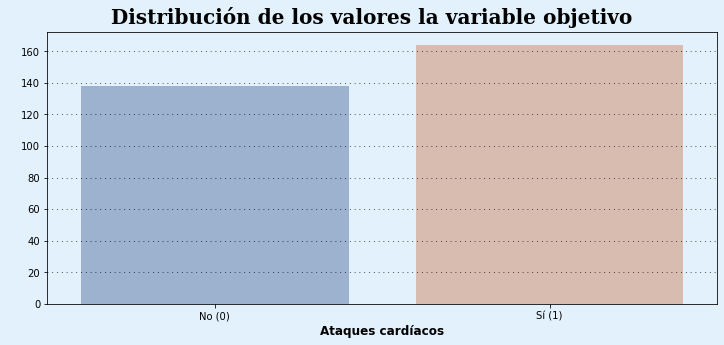

In [17]:
fig, ax = plt.subplots(figsize = (12, 5))

fig.suptitle('Distribución de los valores la variable objetivo', fontweight = 'bold', fontfamily='serif', fontsize = 20, y = 0.95)

ax = sns.countplot(x = var_objetivo[0], data = df, palette = 'deep', alpha=.5, linewidth=0)
ax.set_ylabel(" ")
ax.set_xlabel("Ataques cardíacos", fontweight = 'bold', fontsize = 12)
ax.set_xticklabels(["No (0)", "Sí (1)"])
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax.set_facecolor(background_color) 


array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'sex'}>,
        <AxesSubplot:title={'center':'cp'}>,
        <AxesSubplot:title={'center':'trtbps'}>],
       [<AxesSubplot:title={'center':'chol'}>,
        <AxesSubplot:title={'center':'fbs'}>,
        <AxesSubplot:title={'center':'restecg'}>,
        <AxesSubplot:title={'center':'thalachh'}>],
       [<AxesSubplot:title={'center':'exng'}>,
        <AxesSubplot:title={'center':'oldpeak'}>,
        <AxesSubplot:title={'center':'slp'}>,
        <AxesSubplot:title={'center':'caa'}>],
       [<AxesSubplot:title={'center':'thall'}>,
        <AxesSubplot:title={'center':'output'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

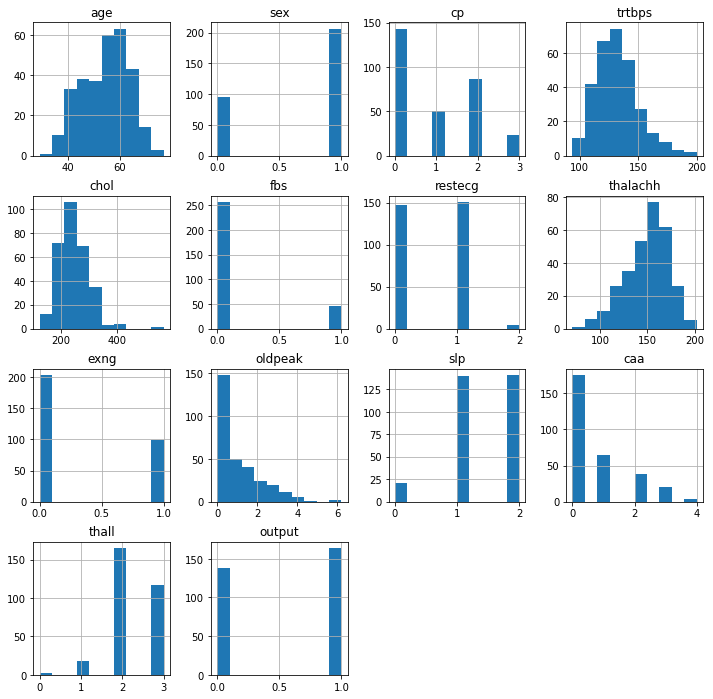

In [18]:
# Histograma de los valores del dataset en todos sus campos para tener una visión general.
df.hist(figsize=(12,12))

#### Correlación de las variables

In [19]:
# Variables continuas
df_corr_cont = df[var_continuas].corr().transpose()
df_corr_cont

,age,trtbps,chol,thalachh,oldpeak
age,1.000000,0.283121,0.207216,-0.395235,0.206040
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600
chol,0.207216,0.125256,1.000000,-0.005308,0.050086
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000


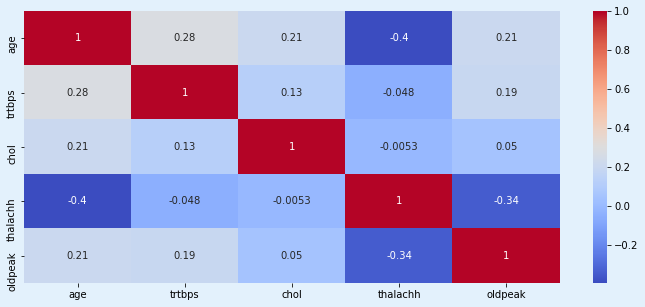

In [20]:
fig, axs = plt.subplots(figsize = (12, 5))

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

sns.heatmap(df_corr_cont, annot = True, cmap = 'coolwarm')
plt.show()

In [21]:
# Variables categóricas
df_corr_categ = df[var_categoricas].corr().transpose()
df_corr_categ

,sex,cp,fbs,restecg,exng,caa,thall,slp
sex,1.000000,-0.051740,0.046022,-0.060351,0.143460,0.113060,0.211452,-0.032990
cp,-0.051740,1.000000,0.096018,0.041561,-0.392937,-0.195356,-0.160370,0.116854
fbs,0.046022,0.096018,1.000000,-0.083081,0.024729,0.144935,-0.032752,-0.058654
restecg,-0.060351,0.041561,-0.083081,1.000000,-0.068807,-0.083112,-0.010473,0.090402
exng,0.143460,-0.392937,0.024729,-0.068807,1.000000,0.125377,0.205826,-0.256106
caa,0.113060,-0.195356,0.144935,-0.083112,0.125377,1.000000,0.160085,-0.092236
thall,0.211452,-0.160370,-0.032752,-0.010473,0.205826,0.160085,1.000000,-0.103314
slp,-0.032990,0.116854,-0.058654,0.090402,-0.256106,-0.092236,-0.103314,1.000000


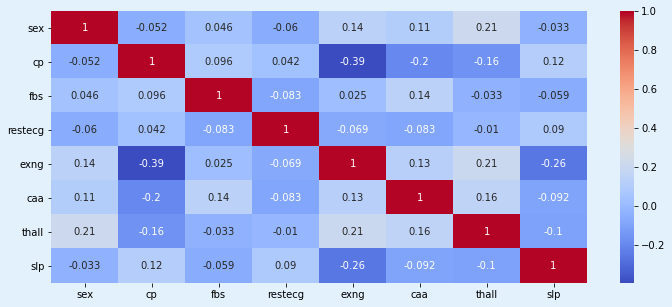

In [22]:
fig, axs = plt.subplots(figsize = (12, 5))

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

sns.heatmap(df_corr_categ, annot = True, cmap = 'coolwarm')
plt.show()

In [23]:
# Variables continuas + categóricas + variable objetivo
todas_var = var_continuas + var_categoricas + var_objetivo

df_corr_todas = df[todas_var].corr().transpose()
df_corr_todas

,age,trtbps,chol,thalachh,oldpeak,sex,cp,fbs,restecg,exng,caa,thall,slp,output
age,1.000000,0.283121,0.207216,-0.395235,0.206040,-0.094962,-0.063107,0.119492,-0.111590,0.093216,0.302261,0.065317,-0.164124,-0.221476
trtbps,0.283121,1.000000,0.125256,-0.048023,0.194600,-0.057647,0.046486,0.178125,-0.115367,0.068526,0.099248,0.062870,-0.122873,-0.146269
chol,0.207216,0.125256,1.000000,-0.005308,0.050086,-0.195571,-0.072682,0.011428,-0.147602,0.064099,0.086878,0.096810,0.000417,-0.081437
thalachh,-0.395235,-0.048023,-0.005308,1.000000,-0.342201,-0.046439,0.293367,-0.007169,0.041210,-0.377411,-0.228311,-0.094910,0.384754,0.419955
oldpeak,0.206040,0.194600,0.050086,-0.342201,1.000000,0.098322,-0.146692,0.004514,-0.056251,0.286766,0.236560,0.209090,-0.576314,-0.429146
sex,-0.094962,-0.057647,-0.195571,-0.046439,0.098322,1.000000,-0.051740,0.046022,-0.060351,0.143460,0.113060,0.211452,-0.032990,-0.283609
cp,-0.063107,0.046486,-0.072682,0.293367,-0.146692,-0.051740,1.000000,0.096018,0.041561,-0.392937,-0.195356,-0.160370,0.116854,0.432080
fbs,0.119492,0.178125,0.011428,-0.007169,0.004514,0.046022,0.096018,1.000000,-0.083081,0.024729,0.144935,-0.032752,-0.058654,-0.026826
restecg,-0.111590,-0.115367,-0.147602,0.041210,-0.056251,-0.060351,0.041561,-0.083081,1.000000,-0.068807,-0.083112,-0.010473,0.090402,0.134874
exng,0.093216,0.068526,0.064099,-0.377411,0.286766,0.143460,-0.392937,0.024729,-0.068807,1.000000,0.125377,0.205826,-0.256106,-0.435601


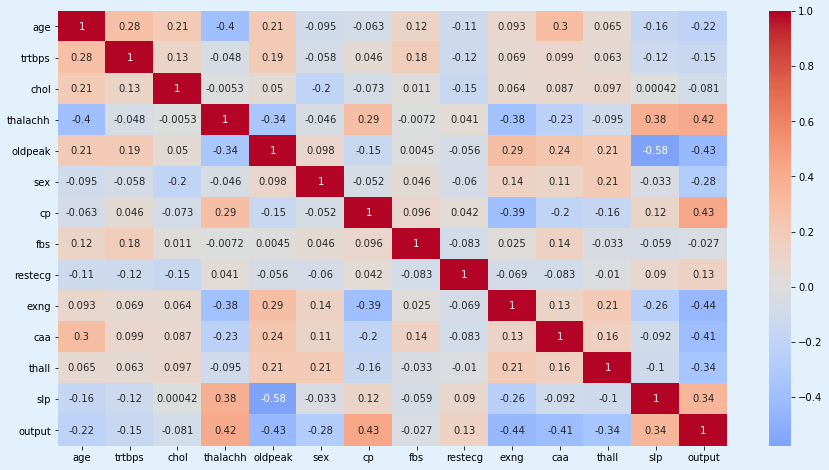

In [113]:
fig, axs = plt.subplots(figsize = (15, 8))

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 

sns.heatmap(df_corr_todas, center=0, cmap='coolwarm', annot = True)
plt.show()

#### Relaciones de variables respecto a la variable objetivo

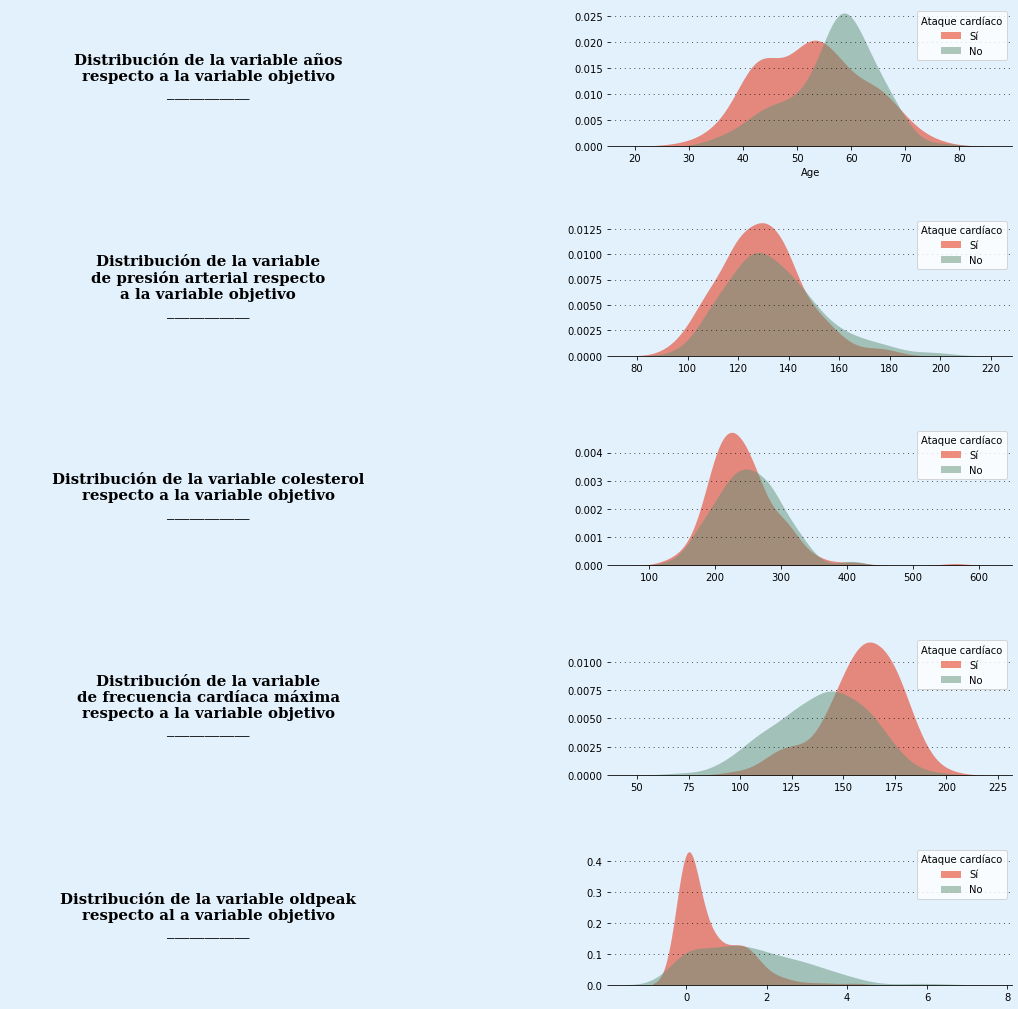

In [24]:
fig = plt.figure(figsize=(18,18))
gs = fig.add_gridspec(5,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)

# Age
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='age', hue="output", fill=True, palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax1.set_xlabel("Age")
ax1.set_ylabel("")
ax1.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título para año
ax0.text(0.5,0.5,"Distribución de la variable años\nrespecto a la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)

# TrTbps
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='trtbps',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título para TrTbps
ax2.text(0.5,0.5,"Distribución de la variable\nde presión arterial respecto\na la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Chol
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax5, data=df, x='chol',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título de Chol
ax4.text(0.5,0.5,"Distribución de la variable colesterol\nrespecto a la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Thalachh
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thalachh',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")
ax7.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Thalachh title
ax6.text(0.5,0.5,"Distribución de la variable\nde frecuencia cardíaca máxima\nrespecto a la variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Oldpeak
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax9, data=df, x='oldpeak',hue="output", fill=True, palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")
ax9.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título de oldpeak
ax8.text(0.5,0.5,"Distribución de la variable oldpeak\nrespecto al a variable objetivo\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 15,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)

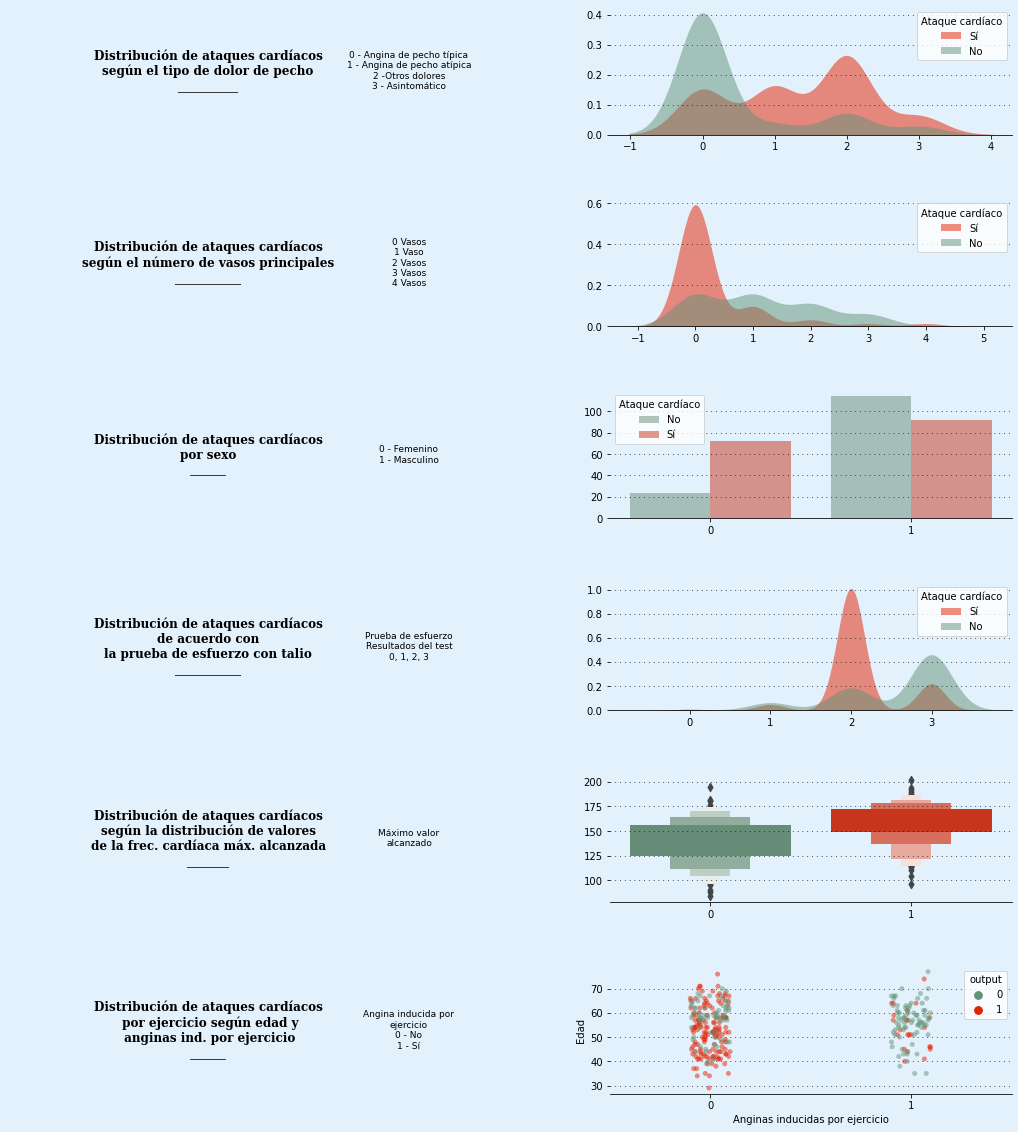

In [30]:
fig = plt.figure(figsize=(18,20))
gs = fig.add_gridspec(6,2)
gs.update(wspace=0.5, hspace=0.5)
ax0 = fig.add_subplot(gs[0,0])
ax1 = fig.add_subplot(gs[0,1])
ax2 = fig.add_subplot(gs[1,0])
ax3 = fig.add_subplot(gs[1,1])
ax4 = fig.add_subplot(gs[2,0])
ax5 = fig.add_subplot(gs[2,1])
ax6 = fig.add_subplot(gs[3,0])
ax7 = fig.add_subplot(gs[3,1])
ax8 = fig.add_subplot(gs[4,0])
ax9 = fig.add_subplot(gs[4,1])
ax10 = fig.add_subplot(gs[5,0])
ax11 = fig.add_subplot(gs[5,1])

background_color = "#e3f1fc"
fig.patch.set_facecolor(background_color) 
ax0.set_facecolor(background_color) 
ax1.set_facecolor(background_color) 
ax2.set_facecolor(background_color)
ax3.set_facecolor(background_color)
ax4.set_facecolor(background_color)
ax5.set_facecolor(background_color) 
ax6.set_facecolor(background_color) 
ax7.set_facecolor(background_color)
ax8.set_facecolor(background_color)
ax9.set_facecolor(background_color)
ax10.set_facecolor(background_color)
ax11.set_facecolor(background_color)

# Título Cp
# 0 = Angina de pecho típica, 1 = Angina de pecho atípica, 2 = Otros dolores, 3 = Asintomático
ax0.text(0.5,0.5,"Distribución de ataques cardíacos\nsegún el tipo de dolor de pecho\n__________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax0.spines["bottom"].set_visible(False)
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.text(1,.5,"0 - Angina de pecho típica\n1 - Angina de pecho atípica\n2 -Otros dolores\n3 - Asintomático",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )

# Cp
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax1, data=df, x='cp',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax1.set_xlabel("")
ax1.set_ylabel("")
ax1.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título Caa
ax2.text(0.5,0.5,"Distribución de ataques cardíacos\nsegún el número de vasos principales\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax2.text(1,.5,"0 Vasos\n1 Vaso\n2 Vasos\n3 Vasos\n4 Vasos",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )

ax2.spines["bottom"].set_visible(False)
ax2.set_xticklabels([])
ax2.set_yticklabels([])
ax2.tick_params(left=False, bottom=False)

# Caa
ax3.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax3, data=df, x='caa',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título Sex
ax4.text(0.5,0.5,"Distribución de ataques cardíacos\npor sexo\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax4.text(1,.5,"0 - Femenino\n1 - Masculino",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )
ax4.spines["bottom"].set_visible(False)
ax4.set_xticklabels([])
ax4.set_yticklabels([])
ax4.tick_params(left=False, bottom=False)

# Sex
ax5.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.countplot(ax=ax5,data=df,x='sex',palette=["#609377", "#e52000"], hue='output', alpha=.5, linewidth=0)
ax5.set_xlabel("")
ax5.set_ylabel("")
ax5.legend(labels=["No","Sí"], title = "Ataque cardíaco")

# Título Thall
ax6.text(0.5,0.5,"Distribución de ataques cardíacos\nde acuerdo con\nla prueba de esfuerzo con talio\n___________",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax6.text(1,.5,"Prueba de esfuerzo\nResultados del test\n0, 1, 2, 3",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )
ax6.spines["bottom"].set_visible(False)
ax6.set_xticklabels([])
ax6.set_yticklabels([])
ax6.tick_params(left=False, bottom=False)

# Thall
ax7.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.kdeplot(ax=ax7, data=df, x='thall',hue="output", fill=True,palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax7.set_xlabel("")
ax7.set_ylabel("")
ax7.legend(labels=["Sí","No"], title = "Ataque cardíaco")

# Título Thalachh
ax8.text(0.5,0.5,"Distribución de ataques cardíacos\nsegún la distribución de valores\nde la frec. cardíaca máx. alcanzada\n_______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax8.text(1,.5,"Máximo valor\nalcanzado",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )

ax8.spines["bottom"].set_visible(False)
ax8.set_xticklabels([])
ax8.set_yticklabels([])
ax8.tick_params(left=False, bottom=False)

# Thalachh
ax9.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.boxenplot(ax=ax9, data=df,x='output',y='thalachh',palette=["#609377", "#e52000"],linewidth=0)
ax9.set_xlabel("")
ax9.set_ylabel("")

# Título Exng
ax10.text(0.5,0.5,"Distribución de ataques cardíacos\n por ejercicio según edad y\n anginas ind. por ejercicio\n______",
        horizontalalignment = 'center',
        verticalalignment = 'center',
        fontsize = 12,
        fontweight='bold',
        fontfamily='serif',
        color='#000000')
ax10.text(1,.5,"Angina inducida por\nejercicio\n0 - No\n1 - Sí",
        horizontalalignment = 'center',
         verticalalignment = 'center',
        fontsize = 9
        )
ax10.spines["bottom"].set_visible(False)
ax10.set_xticklabels([])
ax10.set_yticklabels([])
ax10.tick_params(left=False, bottom=False)


# Exng
ax11.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))
sns.stripplot(ax=ax11, data=df,x='exng',y='age',hue='output', palette=["#609377", "#e52000"], alpha=.5, linewidth=0)
ax11.set_xlabel("Anginas inducidas por ejercicio")
ax11.set_ylabel("Edad")


for i in ["top","left","right"]:
    ax0.spines[i].set_visible(False)
    ax1.spines[i].set_visible(False)
    ax2.spines[i].set_visible(False)
    ax3.spines[i].set_visible(False)
    ax4.spines[i].set_visible(False)
    ax5.spines[i].set_visible(False)
    ax6.spines[i].set_visible(False)
    ax7.spines[i].set_visible(False)
    ax8.spines[i].set_visible(False)
    ax9.spines[i].set_visible(False)
    ax10.spines[i].set_visible(False)
    ax11.spines[i].set_visible(False)

#### Conclusiones extraídas del EDA
- La mayoría de variables continuas tienen outliers, los cuales serán tratados posteriormente.
- El dataset está completo, es decir, no tiene valores perdidos.
- A priori no hay variables que estén muy correlacionadas (no hay variables que superen el 60% tanto positiva como negativamente de nivel de correlación). Si bien es cierto que, con una correlación menor, hay variables algo correlacionadas como son, por ejemplo "slp" y "oldpeak".

- Según los gráficos que relacionan las distintas variables con la variable objetivo, se pueden extraer las siguientes conclusiones:
    - El sexo masculino tiene más posibilidades de sufrir un ataque cardíaco que el femenino. Si bien es cierto, que en el dataset extraído la mayoría de registros son de personas con sexo masculino (más del doble).
    - Las personas con otros dolores distintos a las anginas de pecho tienen más posibilidades de sufrir ataques cardíacos.
    - Las personas con mayor frecuencia cardíaca máxima tienen más posibilidades de sufrir ataques cardíacos.
    - Las personas con picos más bajos (oldpeak) tienen también más posibilidades de sufrir ataques cardíacos.
    - Las personas con 0 vasos principales también tienen más posibilidades de sufrir ataques cardíacos.
    - Las personas con resultado 2 en la prueba de esfuerzo con thalio también tienen más posibilidades de sufrir ataques cardíacos.
    - Las personas sin angina de pecho inducida por ejercicio tienen más probabilidades de sufrir ataques cardíacos.
    
    



### Preprocesamiento de datos 

#### Tratamiento de outliers

In [26]:
# Hay outliers en las variables "trtbps", "chol", "thalachh" y "oldpeak".
# Se imprimirá a continuación las estadísticas de cada una de estas variables para decidir como se imputan estos outliers:
valores_con_out = ["trtbps", "chol", "thalachh", "oldpeak"]
df[valores_con_out].describe()

,trtbps,chol,thalachh,oldpeak
count,302.000000,302.000000,302.000000,302.000000
mean,131.602649,246.500000,149.569536,1.043046
std,17.563394,51.753489,22.903527,1.161452
min,94.000000,126.000000,71.000000,0.000000
25%,120.000000,211.000000,133.250000,0.000000
50%,130.000000,240.500000,152.500000,0.800000
75%,140.000000,274.750000,166.000000,1.600000
max,200.000000,564.000000,202.000000,6.200000


In [27]:
# trtbps: Presión arterial en reposo (en mmHg)
Q1_trtbps = df['trtbps'].quantile(0.25) # Primer cuartil
Q3_trtbps = df['trtbps'].quantile(0.75) # Tercer cuartil
IQR_trtbps = Q3_trtbps - Q1_trtbps # Rango intercuartílico
low_whisk_trtbps = Q1_trtbps - 1.5 * IQR_trtbps # Bigote inferior
up_whisk_trtbps = Q3_trtbps + 1.5 * IQR_trtbps # Bigote superior

# chol: Colesterol en mg/dl obtenido a través del sensor BMI 
Q1_chol = df['chol'].quantile(0.25) # Primer cuartil
Q3_chol = df['chol'].quantile(0.75) # Tercer cuartil
IQR_chol = Q3_chol - Q1_chol # Rango intercuartílico
low_whisk_chol = Q1_chol - 1.5 * IQR_chol # Bigote inferior
up_whisk_chol = Q3_chol + 1.5 * IQR_chol # Bigote superior

# thalachh - Frecuencia cardíaca máxima alcanzada
Q1_thalachh = df['thalachh'].quantile(0.25) # Primer cuartil
Q3_thalachh = df['thalachh'].quantile(0.75) # Tercer cuartil
IQR_thalachh = Q3_thalachh - Q1_thalachh # Rango intercuartílico
low_whisk_thalachh = Q1_thalachh - 1.5 * IQR_thalachh # Bigote inferior
up_whisk_thalachh = Q3_thalachh + 1.5 * IQR_thalachh # Bigote superior

# oldpeak - Pico anterior 
Q1_oldpeak = df['oldpeak'].quantile(0.25) # Primer cuartil
Q3_oldpeak = df['oldpeak'].quantile(0.75) # Tercer cuartil
IQR_oldpeak = Q3_oldpeak - Q1_oldpeak # Rango intercuartílico
low_whisk_oldpeak = Q1_oldpeak - 1.5 * IQR_oldpeak # Bigote inferior
up_whisk_oldpeak = Q3_oldpeak + 1.5 * IQR_oldpeak # Bigote superior

print("Para trtbps -> bigote inferior: {}, bigote superior: {}".format(low_whisk_trtbps, up_whisk_trtbps))
print("Para chol -> bigote inferior: {}, bigote superior: {}".format(low_whisk_chol, up_whisk_chol))
print("Para thalachh -> bigote inferior: {}, bigote superior: {}".format(low_whisk_thalachh, up_whisk_thalachh))
print("Para oldpeak -> bigote inferior: {}, bigote superior: {}".format(min(df['oldpeak']), up_whisk_oldpeak))


Para trtbps -> bigote inferior: 90.0, bigote superior: 170.0
Para chol -> bigote inferior: 115.375, bigote superior: 370.375
Para thalachh -> bigote inferior: 84.125, bigote superior: 215.125
Para oldpeak -> bigote inferior: 0.0, bigote superior: 4.0


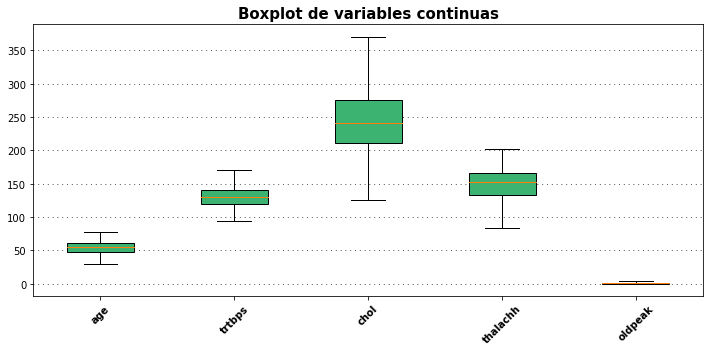

In [28]:
# Todos los outliers por encima o por debajo se imputarán como el valor del bigote superior o inferior según corresponda en cada una de las variables.
# Posteriormente se dibujará de nuevo los boxplots para comprobar si los outliers han desaparecido.
df['trtbps'] = np.where(df['trtbps'] > up_whisk_trtbps, up_whisk_trtbps, df['trtbps'])
df['chol'] = np.where(df['chol'] > up_whisk_chol, up_whisk_chol, df['chol'])
df['thalachh'] = np.where(df['thalachh'] < low_whisk_thalachh, low_whisk_thalachh, df['thalachh'])
df['oldpeak'] = np.where(df['oldpeak'] > up_whisk_oldpeak, up_whisk_oldpeak, df['oldpeak'])


flierprops = dict(marker = 'o', markerfacecolor = 'red', markersize = 5, linestyle='none') # Para los outliers en el boxplot

fig, ax = plt.subplots(figsize = (12, 5))
plot_outliers = ax.boxplot(df[var_continuas], 
                flierprops = flierprops, 
                patch_artist = True,
                boxprops = dict(facecolor='mediumseagreen'))
ax.set_title("Boxplot de variables continuas", 
            color = 'black', 
            fontweight = 'bold', 
            fontsize = '15')
ax.set_xticklabels(var_continuas, 
                  color = 'black', 
                  rotation = 45, 
                  fontweight = 'bold', 
                  fontsize = '10')
ax.grid(color='#000000', linestyle=':', axis='y', zorder=0,  dashes=(1,5))

plt.show()

# Como se puede observar, ya no habría outliers.